<a href="https://colab.research.google.com/github/klajosw/python/blob/master/kl_py_svg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="left"> 
    <img src="https://raw.githubusercontent.com/klajosw/python/master/kl_mie_python_logo_250.jpg" 
         align="left" width="251" height="251">
    
</p>


<p> </p>



# Python alapok (rajzolás, svg)

<https://klajosw.blogspot.com/>


---

In [ ]:
%%cmd
dir



In [ ]:
!rem dir
!cd


C:\Users\User\Documents\kl\mintak\jupiter\kl\aa_kl_2020


In [ ]:
!pip install drawSvg
!pip install hyperbolic

In [ ]:
import drawSvg as draw

d = draw.Drawing(200, 100, origin='center', displayInline=False)

# Draw an irregular polygon
d.append(draw.Lines(-80, -45,
                    70, -49,
                    95, 49,
                    -90, 40,
                    close=False,
            fill='#eeee00',
            stroke='black'))

# Draw a rectangle
r = draw.Rectangle(-80,0,40,50, fill='#1248ff')
r.appendTitle("Our first rectangle")  # Add a tooltip
d.append(r)

# Draw a circle
d.append(draw.Circle(-40, -10, 30,
            fill='red', stroke_width=2, stroke='black'))

# Draw an arbitrary path (a triangle in this case)
p = draw.Path(stroke_width=2, stroke='lime',
              fill='black', fill_opacity=0.2)
p.M(-10, 20)  # Start path at point (-10, 20)
p.C(30, -10, 30, 50, 70, 20)  # Draw a curve to (70, 20)
d.append(p)

# Draw text
d.append(draw.Text('Basic text', 8, -10, 35, fill='blue'))  # Text with font size 8
d.append(draw.Text('Path text', 8, path=p, text_anchor='start', valign='middle'))
d.append(draw.Text(['Multi-line', 'text'], 8, path=p, text_anchor='end'))

# Draw multiple circular arcs
d.append(draw.ArcLine(60,-20,20,60,270,
            stroke='red', stroke_width=5, fill='red', fill_opacity=0.2))
d.append(draw.Arc(60,-20,20,60,270,cw=False,
            stroke='green', stroke_width=3, fill='none'))
d.append(draw.Arc(60,-20,20,270,60,cw=True,
            stroke='blue', stroke_width=1, fill='black', fill_opacity=0.3))

# Draw arrows
arrow = draw.Marker(-0.1, -0.5, 0.9, 0.5, scale=4, orient='auto')
arrow.append(draw.Lines(-0.1, -0.5, -0.1, 0.5, 0.9, 0, fill='red', close=True))
p = draw.Path(stroke='red', stroke_width=2, fill='none',
              marker_end=arrow)  # Add an arrow to the end of a path
p.M(20, -40).L(20, -27).L(0, -20)  # Chain multiple path operations
d.append(p)
d.append(draw.Line(30, -20, 0, -10,
            stroke='red', stroke_width=2, fill='none',
            marker_end=arrow))  # Add an arrow to the end of a line

d.setPixelScale(2)  # Set number of pixels per geometry unit
#d.setRenderSize(400,200)  # Alternative to setPixelScale
d.saveSvg('example.svg')
#d.savePng('example.png')

# Display in Jupyter notebook
#d.rasterize()  # Display as PNG
d  # Display as SVG

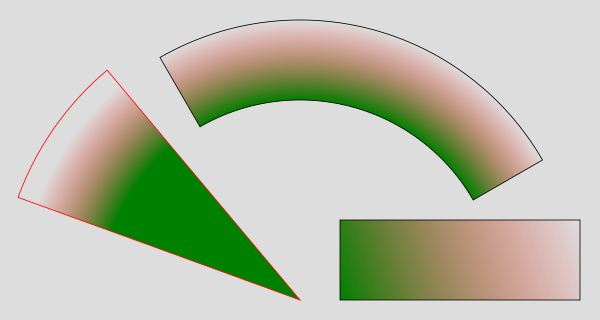

In [ ]:
import drawSvg as draw

d = draw.Drawing(1.5, 0.8, origin='center')

d.draw(draw.Rectangle(-0.75,-0.5,1.5,1, fill='#ddd'))

# Create gradient
gradient = draw.RadialGradient(0,-0.35,0.7*10)
gradient.addStop(0.5/0.7/10, 'green', 1)
gradient.addStop(1/10, 'red', 0)

# Draw a shape to fill with the gradient
p = draw.Path(fill=gradient, stroke='black', stroke_width=0.002)
p.arc(0,-0.35,0.7,30,120)
p.arc(0,-0.35,0.5,120,30,cw=True, includeL=True)
p.Z()
d.append(p)

# Draw another shape to fill with the same gradient
p = draw.Path(fill=gradient, stroke='red', stroke_width=0.002)
p.arc(0,-0.35,0.75,130,160)
p.arc(0,-0.35,0,160,130,cw=True, includeL=True)
p.Z()
d.append(p)

# Another gradient
gradient2 = draw.LinearGradient(0.1,-0.35,0.1+0.6,-0.35+0.2)
gradient2.addStop(0, 'green', 1)
gradient2.addStop(1, 'red', 0)
d.append(draw.Rectangle(0.1,-0.35,0.6,0.2,
                        stroke='black', stroke_width=0.002,
                        fill=gradient2))

# Display
d.setRenderSize(w=600)
d

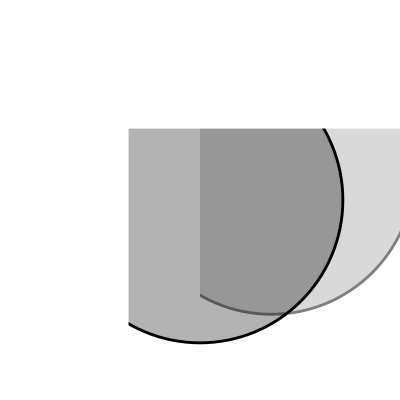

In [ ]:
import drawSvg as draw

d = draw.Drawing(1.4, 1.4, origin='center')

# Define clip path
clip = draw.ClipPath()
clip.append(draw.Rectangle(-.25,.25-1,1,1))

# Draw a cropped circle
c = draw.Circle(0,0,0.5, stroke_width='0.01', stroke='black',
                         fill_opacity=0.3, clip_path=clip,
                         id='circle')
d.append(c)

# Make a transparent copy, cropped again
g = draw.Group(opacity=0.5, clip_path=clip)
g.append(draw.Use('circle', 0.25,0.1))
d.append(g)

# Display
d.setRenderSize(400)
d

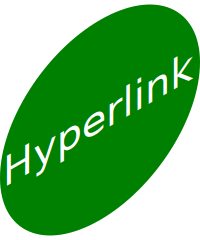

In [ ]:
import drawSvg as draw

# Subclass DrawingBasicElement if it cannot have child nodes
# Subclass DrawingParentElement otherwise
# Subclass DrawingDef if it must go between <def></def> tags in an SVG
class Hyperlink(draw.DrawingParentElement):
    TAG_NAME = 'a'
    def __init__(self, href, target=None, **kwargs):
        # Other init logic...
        # Keyword arguments to super().__init__() correspond to SVG node
        # arguments: stroke_width=5 -> stroke-width="5"
        super().__init__(href=href, target=target, **kwargs)

d = draw.Drawing(1, 1.2, origin='center')

# Create hyperlink
hlink = Hyperlink('https://www.python.org', target='_blank',
                  transform='skewY(-30)')
# Add child elements
hlink.append(draw.Circle(0,0,0.5, fill='green'))
hlink.append(draw.Text('Hyperlink',0.2, 0,0, center=0.6, fill='white'))

# Draw and display
d.append(hlink)
d.setRenderSize(200)
d

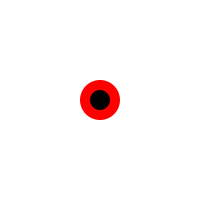

In [ ]:
import drawSvg as draw

d = draw.Drawing(200, 200, origin='center')

# Animate the position and color of circle
c = draw.Circle(0, 0, 20, fill='red')
# See for supported attributes:
# https://developer.mozilla.org/en-US/docs/Web/SVG/Element/animate
c.appendAnim(draw.Animate('cy', '6s', '-80;80;-80',
                          repeatCount='indefinite'))
c.appendAnim(draw.Animate('cx', '6s', '0;80;0;-80;0',
                          repeatCount='indefinite'))
c.appendAnim(draw.Animate('fill', '6s', 'red;green;blue;yellow',
                          calcMode='discrete',
                          repeatCount='indefinite'))
d.append(c)

# Animate a black circle around an ellipse
ellipse = draw.Path()
ellipse.M(-90, 0)
ellipse.A(90, 40, 360, True, True, 90, 0)  # Ellipse path
ellipse.A(90, 40, 360, True, True, -90, 0)
ellipse.Z()
c2 = draw.Circle(0, 0, 10)
# See for supported attributes:
# https://developer.mozilla.org/en-US/docs/Web/SVG/Element/animateMotion
c2.appendAnim(draw.AnimateMotion(ellipse, '3s',
                                 repeatCount='indefinite'))
# See for supported attributes:
# https://developer.mozilla.org/en-US/docs/Web/SVG/Element/animateTransform
c2.appendAnim(draw.AnimateTransform('scale', '3s', '1,2;2,1;1,2;2,1;1,2',
                                    repeatCount='indefinite'))
d.append(c2)

d.saveSvg('animated.svg')  # Save to file
d  # Display in Jupyter notebook

In [ ]:
import drawSvg as draw
from drawSvg.widgets import DrawingWidget
import hyperbolic.poincare.shapes as hyper  # pip3 install hyperbolic

# Create drawing
d = draw.Drawing(2, 2, origin='center')
d.setRenderSize(500)
d.append(draw.Circle(0, 0, 1, fill='orange'))
group = draw.Group()
d.append(group)

# Update the drawing based on user input
click_list = []
def redraw(points):
    group.children.clear()
    for x1, y1 in points:
        for x2, y2 in points:
            if (x1, y1) == (x2, y2): continue
            p1 = hyper.Point.fromEuclid(x1, y1)
            p2 = hyper.Point.fromEuclid(x2, y2)
            if p1.distanceTo(p2) <= 2:
                line = hyper.Line.fromPoints(*p1, *p2, segment=True)
                group.draw(line, hwidth=0.2, fill='white')
    for x, y in points:
        p = hyper.Point.fromEuclid(x, y)
        group.draw(hyper.Circle.fromCenterRadius(p, 0.1),
                   fill='green')
redraw(click_list)

# Create interactive widget and register mouse events
widget = DrawingWidget(d)
@widget.mousedown
def mousedown(widget, x, y, info):
    if (x**2 + y**2) ** 0.5 + 1e-5 < 1:
        click_list.append((x, y))
    redraw(click_list)
    widget.refresh()
@widget.mousemove
def mousemove(widget, x, y, info):
    if (x**2 + y**2) ** 0.5 + 1e-5 < 1:
        redraw(click_list + [(x, y)])
    widget.refresh()
widget

DrawingWidget()

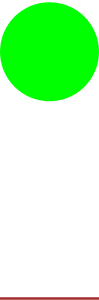

In [ ]:
import drawSvg as draw

# Draw a frame of the animation
def draw_frame(t):
    d = draw.Drawing(2, 6.05, origin=(-1,-1.05))
    d.setRenderSize(h=300)
    d.append(draw.Rectangle(-2, -2, 4, 8, fill='white'))
    d.append(draw.Rectangle(-1, -1.05, 2, 0.05, fill='brown'))
    t = (t + 1) % 2 - 1
    y = 4 - t**2 * 4
    d.append(draw.Circle(0, y, 1, fill='lime'))
    return d

with draw.animate_jupyter(draw_frame, delay=0.05) as anim:
# Or:
#with draw.animate_video('example6.gif', draw_frame, duration=0.05
#                       ) as anim:
    # Add each frame to the animation
    for i in range(20):
        anim.draw_frame(i/10)
    for i in range(20):
        anim.draw_frame(i/10)
    for i in range(20):
        anim.draw_frame(i/10)

In [ ]:
# Jupyter cell 1:
import drawSvg as draw
from drawSvg.widgets import AsyncAnimation
widget = AsyncAnimation(fps=10)
widget
# [Animation is displayed here (click to pause)]

# Jupyter cell 2:
global_variable = 'a'
@widget.set_draw_frame  # Animation above is automatically updated
def draw_frame(secs=0):
    # Draw something...
    d = draw.Drawing(100, 40)
    d.append(draw.Text(global_variable, 20, 0, 10))
    d.append(draw.Text('{:0.1f}'.format(secs), 20, 30, 10))
    return d

# Jupyter cell 3:
global_variable = 'b'  # Animation above now displays 'b'